In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import json

In [2]:
plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
def plot_perf(log):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            m = float(line.split()[0])
            n = float(line.split()[1])
            k = float(line.split()[2])
            time = float(line.split()[3])
            cost = float(line.split()[4])
            x.append(cost/(m*n + n*k + m*k))
            y.append((cost/time)*1e-9)
            

    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("F/B")
    plt.ylabel("GF/s")
    plt.plot(x,y,'.',color='grey')

In [4]:
def plot_perf_square(log):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            m = float(line.split()[0])
            n = float(line.split()[1])
            k = float(line.split()[2])
            if m==n==k:
                time = float(line.split()[3])
                cost = float(line.split()[4])
                x.append(m)
                y.append((cost/time)*1e-9)
            

    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel("size")
    plt.ylabel("GF/s")
    plt.plot(x,y,'.',color='grey')

In [5]:
def get_data(filename):
    data = {}
    with open(filename) as f:
        lines = f.readlines()
        for line in lines:
            x = line.split()[0] + " " + line.split()[1] + " " + line.split()[2]
            time = float(line.split()[3])
            cost = float(line.split()[4])
            y = (cost/time)*1e-9
            try:
                data[x].append(y)
            except KeyError:
                data[x] = []
                data[x].append(y)

    for k,v in data.items():
        v.sort()
        
    return data

def get_quantile_gt(data,quantile):
    x_q = []
    y_q = []
    q = int(quantile*100)
    for k,v in data.items():
        x_q.append(k)
        y_q.append(v[q])
        
    return (x_q,y_q)

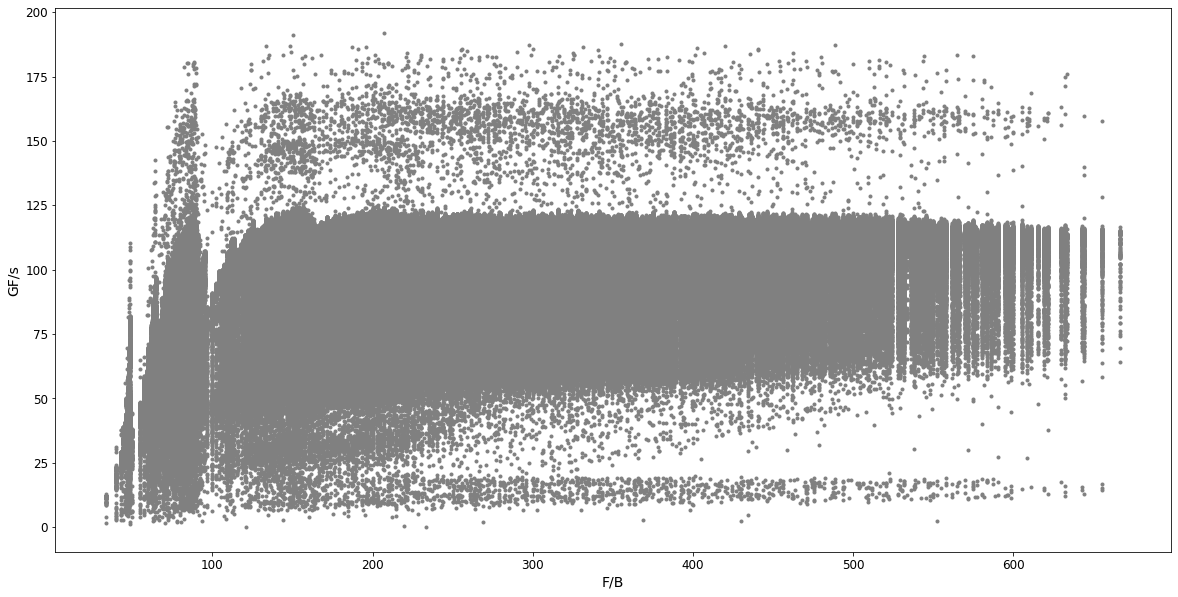

In [6]:
plot_perf("sample_size_estimation/data/gemm_mnk_random2.txt")
plt.show()

In [101]:
QUANTILES = [0.15,0.5,0.85]
filename = "sample_size_estimation/data/gemm_mnk_random2.txt"
data = get_data(filename)
x_q1, y_q1 = get_quantile_gt(data,QUANTILES[0])
x_q2, y_q2 = get_quantile_gt(data,QUANTILES[1])
x_q3, y_q3 = get_quantile_gt(data,QUANTILES[2])

In [14]:
def get_plot_axis_sq(x_q,y_q):
    x = []
    y = []
    for i,j in zip(x_q,y_q):
        m = int(i.split()[0])
        n = int(i.split()[1])
        k = int(i.split()[2])
        if m==n==k:
            x.append(m)
            y.append(j)
    return (x,y)

In [25]:
def get_plot_axis_full(x_q,y_q):
    x = []
    y = []
    for i,j in zip(x_q,y_q):
        m = int(i.split()[0])
        n = int(i.split()[1])
        k = int(i.split()[2])
        x.append((2*m*n*k)/(m*n + n*k + m*k))
        y.append(j)
    return (x,y)

In [102]:
x_sq_q1,y_sq_q1 = get_plot_axis_sq(x_q1,y_q1)
x_sq_q2,y_sq_q2 = get_plot_axis_sq(x_q2,y_q2)
x_sq_q3,y_sq_q3 = get_plot_axis_sq(x_q3,y_q3)

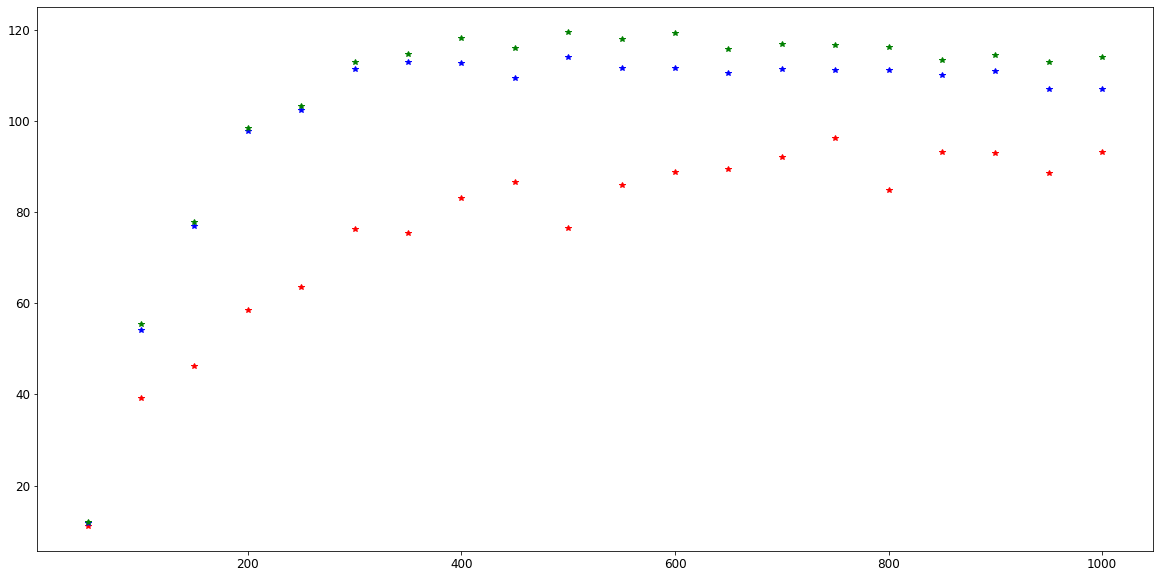

In [110]:
#plot_perf_square(filename)
plt.plot(x_sq_q1,y_sq_q1,'*',color='r')
plt.plot(x_sq_q2,y_sq_q2,'*',color='b')
plt.plot(x_sq_q3,y_sq_q3,'*',color='g')
plt.show()

In [104]:
x_f_q1,y_f_q1 = get_plot_axis_full(x_q1,y_q1)
x_f_q2,y_f_q2 = get_plot_axis_full(x_q2,y_q2)
x_f_q3,y_f_q3 = get_plot_axis_full(x_q3,y_q3)

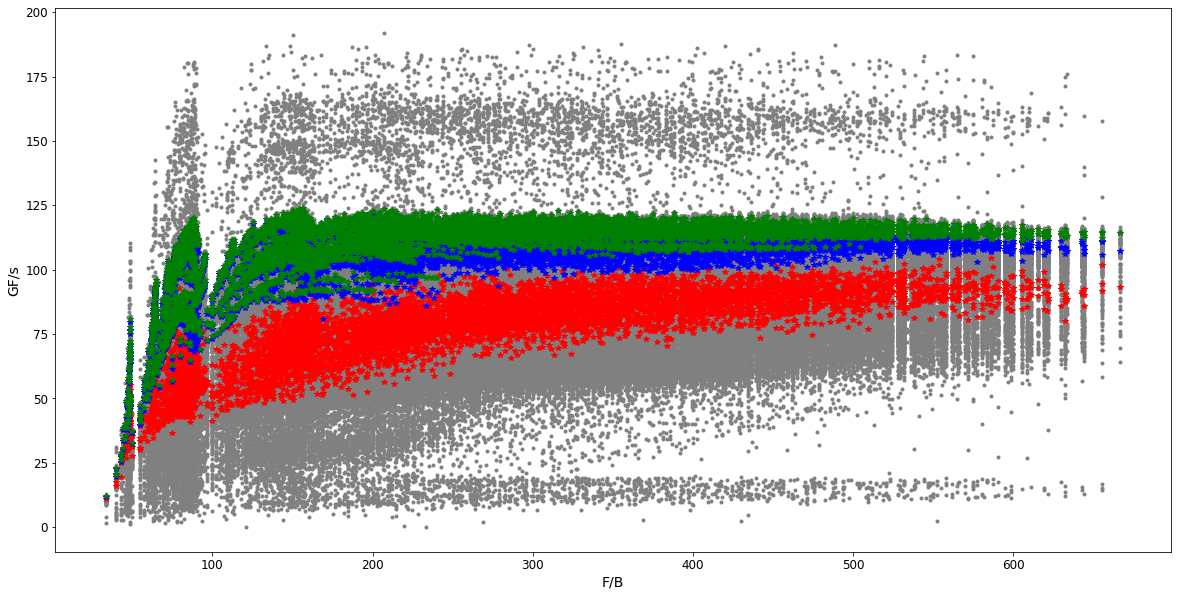

In [105]:
plot_perf(filename)
plt.plot(x_f_q1,y_f_q1,'*',color='r')
plt.plot(x_f_q2,y_f_q2,'*',color='b')
plt.plot(x_f_q3,y_f_q3,'*',color='g')
plt.show()

### Sampling

In [55]:
def get_sample_quantile_gt(data,sample_size,quantiles):
    x_q = []
    y_q1 = []
    y_q2 = []
    y_q3 = []
    q1 = int(quantiles[0]*sample_size)
    q2 = int(quantiles[1]*sample_size)
    q3 = int(quantiles[2]*sample_size)
    for k,v in data.items():
        x_q.append(k)
        measurements = random.sample(v,sample_size)
        measurements.sort()
        y_q1.append(measurements[q1])
        y_q2.append(measurements[q2])
        y_q3.append(measurements[q3])
        
    return (x_q,y_q1,y_q2,y_q3)

In [106]:
s_x_q1, s_y_q1, s_y_q2, s_y_q3 = get_sample_quantile_gt(data,20,QUANTILES)

In [107]:
s_x_sq_q1,s_y_sq_q1 = get_plot_axis_sq(s_x_q1,s_y_q1)
s_x_sq_q2,s_y_sq_q2 = get_plot_axis_sq(s_x_q1,s_y_q2)
s_x_sq_q3,s_y_sq_q3 = get_plot_axis_sq(s_x_q1,s_y_q3)

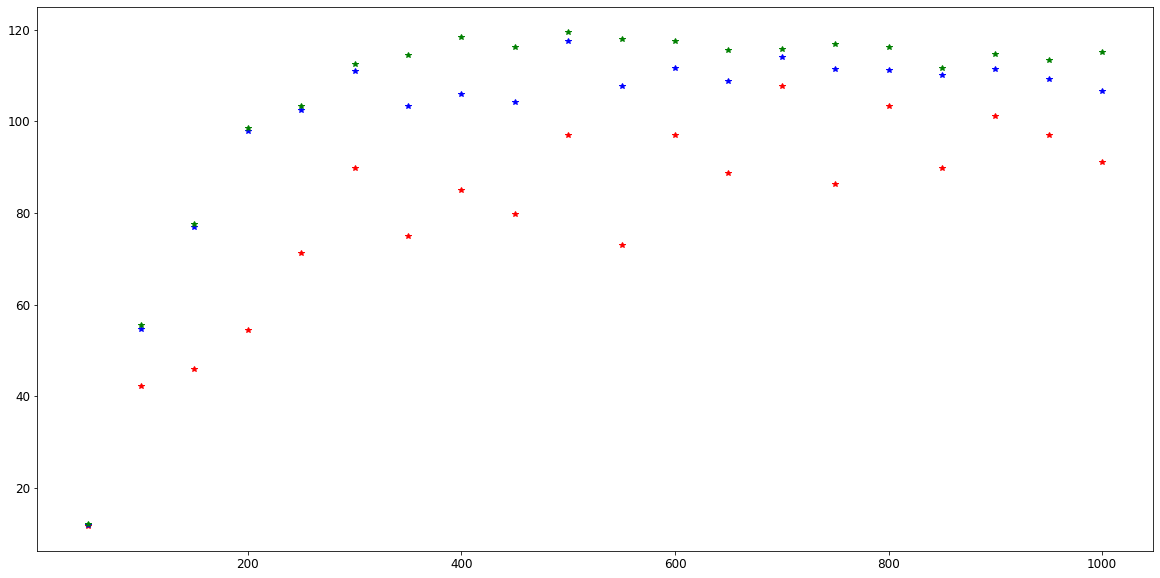

In [109]:
#plot_perf_square(filename)
plt.plot(s_x_sq_q1,s_y_sq_q1,'*',color='r')
plt.plot(s_x_sq_q2,s_y_sq_q2,'*',color='b')
plt.plot(s_x_sq_q3,s_y_sq_q3,'*',color='g')
plt.show()

In [111]:
s_x_f_q1,s_y_f_q1 = get_plot_axis_full(s_x_q1,s_y_q1)
s_x_f_q2,s_y_f_q2 = get_plot_axis_full(s_x_q1,s_y_q2)
s_x_f_q3,s_y_f_q3 = get_plot_axis_full(s_x_q1,s_y_q3)

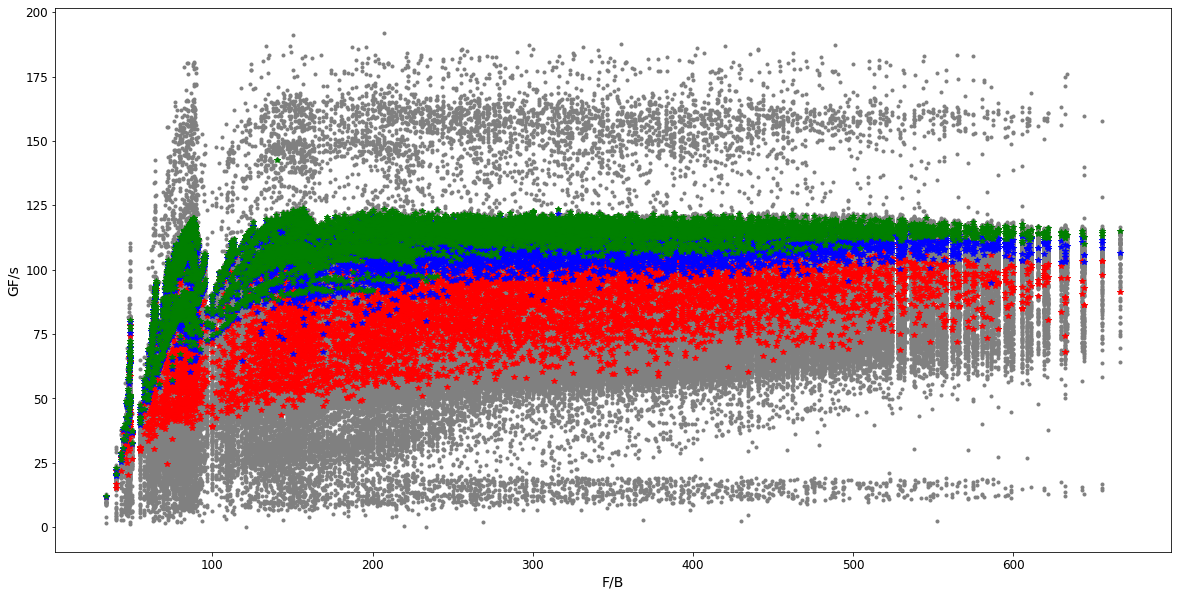

In [112]:
plot_perf("sample_size_estimation/data/gemm_mnk_random2.txt")
plt.plot(s_x_f_q1,s_y_f_q1,'*',color='r')
plt.plot(s_x_f_q2,s_y_f_q2,'*',color='b')
plt.plot(s_x_f_q3,s_y_f_q3,'*',color='g')
plt.show()

(array([1., 0., 0., 2., 1., 1., 1., 1., 1., 2.]),
 array([ 84.26773968,  87.5467125 ,  90.82568532,  94.10465814,
         97.38363097, 100.66260379, 103.94157661, 107.22054943,
        110.49952226, 113.77849508, 117.0574679 ]),
 <a list of 10 Patch objects>)

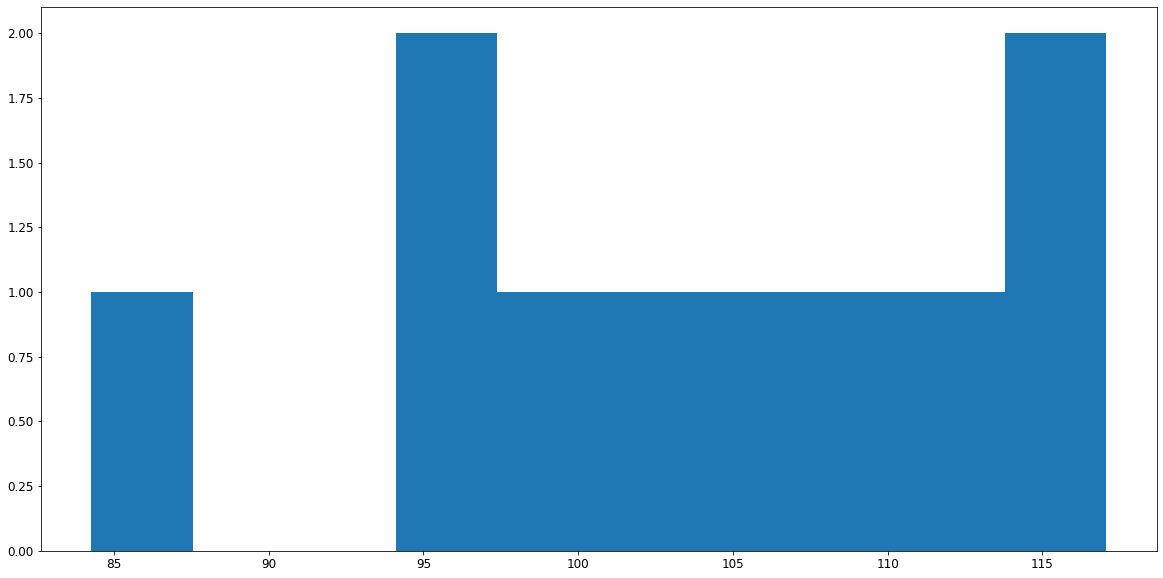

In [133]:
plt.hist(random.sample(data["800 1000 1000"],10))

### Sample size analysis

In [199]:
N = 100
sample_sizes = [i for i in range(100,0,-5)]
results = {}
for k,v in data.items():
    results[k] = {}
    for s in sample_sizes:
        l = int(QUANTILES[0]*s)
        u = int(QUANTILES[2]*s)
        bounds = []
        for n in range(N):
            meas = random.sample(v,s)
            meas.sort()
            bounds.append(float(meas[u])/float(meas[l]))
        results[k][s] = bounds
        

### Dump results

In [201]:
import json
with open('sample_size_estimation/data/gemm_mnk_random2_result.json', 'w') as fp:
    json.dump(results, fp)

### Read results

In [7]:
with open('sample_size_estimation/data/gemm_mnk_random2_result.json') as fp:
    results = json.load(fp)

In [14]:
deviations = {}
for k,v in results.items():
    deviations[k] = {}
    for k2,v2 in v.items():
        deviations[k][k2] = np.max((np.array(v2) - np.array(results[k]['100']))**2)

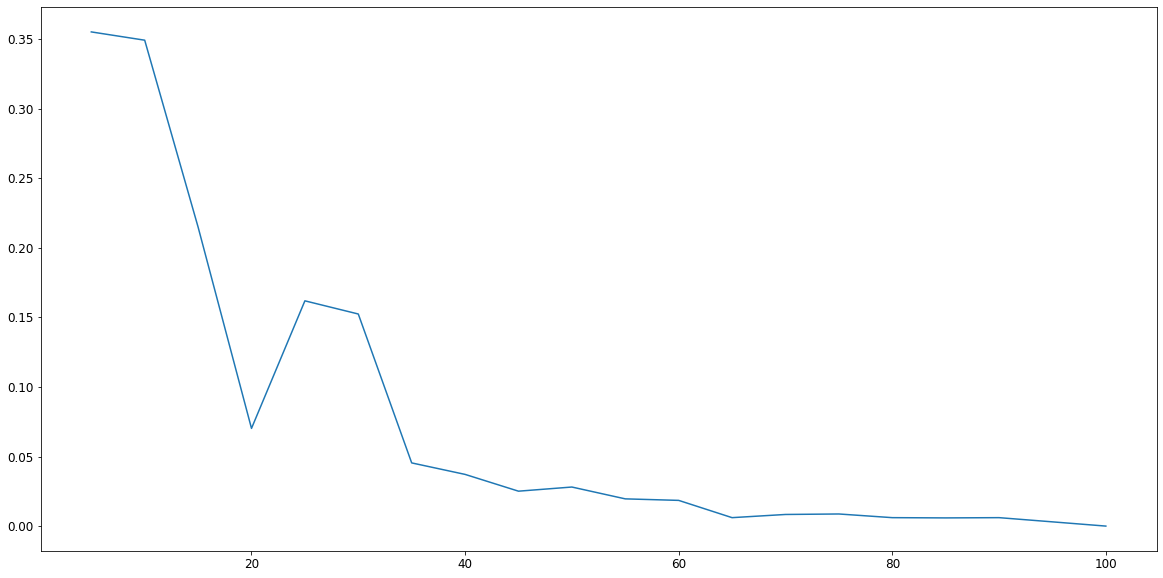

In [23]:
dim_str = "100 1000 900"
#plt.plot(list(results[dim_str].keys()), list(results[dim_str].values()))
plt.plot(list(map(int,deviations[dim_str].keys())), list(deviations[dim_str].values()))

### Histogram of deviation of bound width

In [24]:
dev_hist = {}
for k,v in results.items():
    dev_hist[k] = {}
    for k2,v2 in v.items():
        dev_hist[k][k2] = np.array(v2) - np.array(results[k]['100'])

(array([26.,  6., 11., 11., 44.,  0.,  1.,  0.,  0.,  1.]),
 array([-0.84910122, -0.63470319, -0.42030516, -0.20590713,  0.0084909 ,
         0.22288893,  0.43728696,  0.65168499,  0.86608301,  1.08048104,
         1.29487907]),
 <a list of 10 Patch objects>)

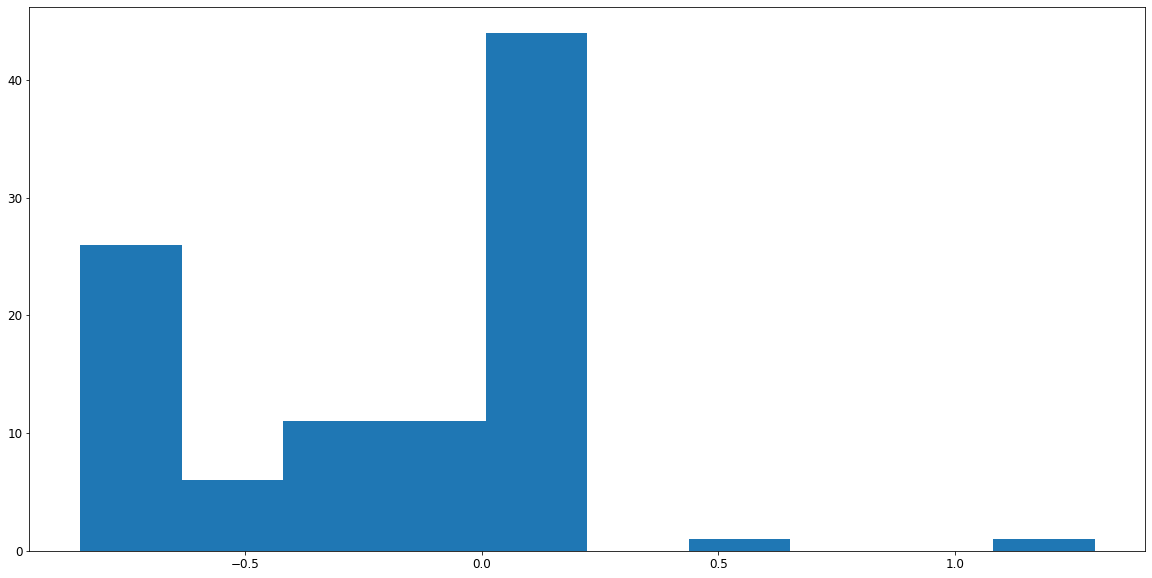

In [104]:
plt.hist(dev_hist["1000 100 100"]['10'])

### Central limit - deviation of bound width

In [99]:
count = 0
dev_hist_c = {}
for k,v in results.items():
    count += 1
    if(count%500 == 0):
        print(count)
    dev_hist_c[k] = {}
    for k2,v2 in v.items():
        sample_means = []
        devs = np.array(v2) - np.array(results[k]['100'])
        for i in range(100):
            sample_means.append(np.mean(random.sample(list(devs),30)))
        dev_hist_c[k][k2] = sample_means

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000


(array([ 3.,  4.,  9., 13., 19., 19., 14., 14.,  3.,  2.]),
 array([-0.41165593, -0.37779925, -0.34394258, -0.3100859 , -0.27622922,
        -0.24237255, -0.20851587, -0.17465919, -0.14080252, -0.10694584,
        -0.07308916]),
 <a list of 10 Patch objects>)

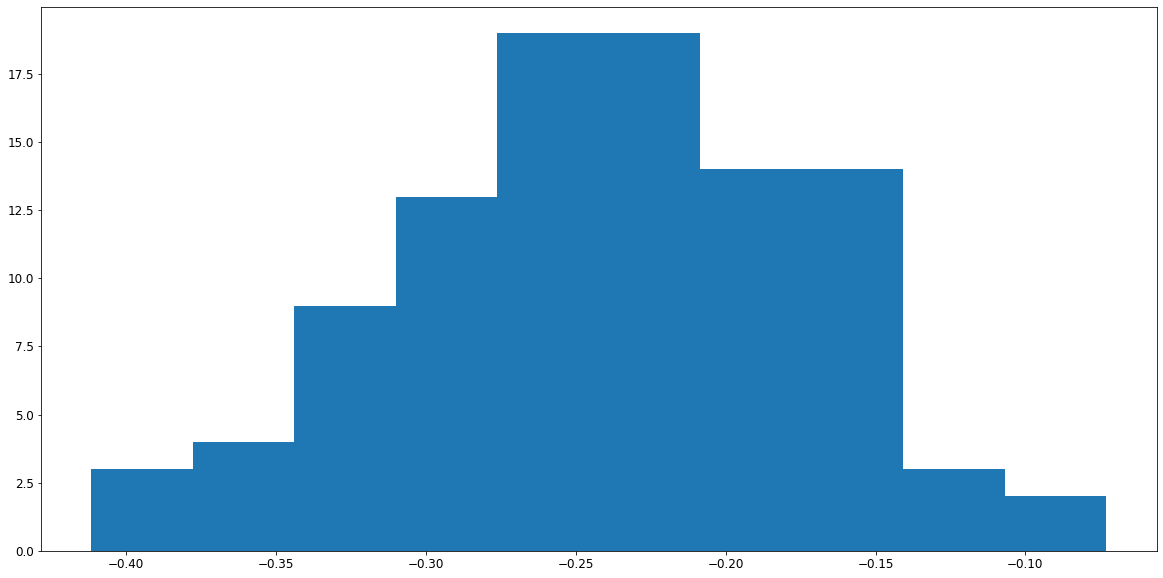

In [105]:
plt.hist(dev_hist_c["1000 100 100"]['10'])

### Dump central limit data

In [106]:
with open('sample_size_estimation/data/gemm_mnk_random2_result_central_lim.json', 'w') as fp:
    json.dump(dev_hist_c, fp)

### Bound of bound widths

In [107]:
bb_width = {}
l = 10
u = 90
for k,v in dev_hist_c.items():
    bb_width[k] = {}
    for k2,v2 in v.items():
        v2.sort()
        bb_width[k][k2] = v2[u] - v2[l]

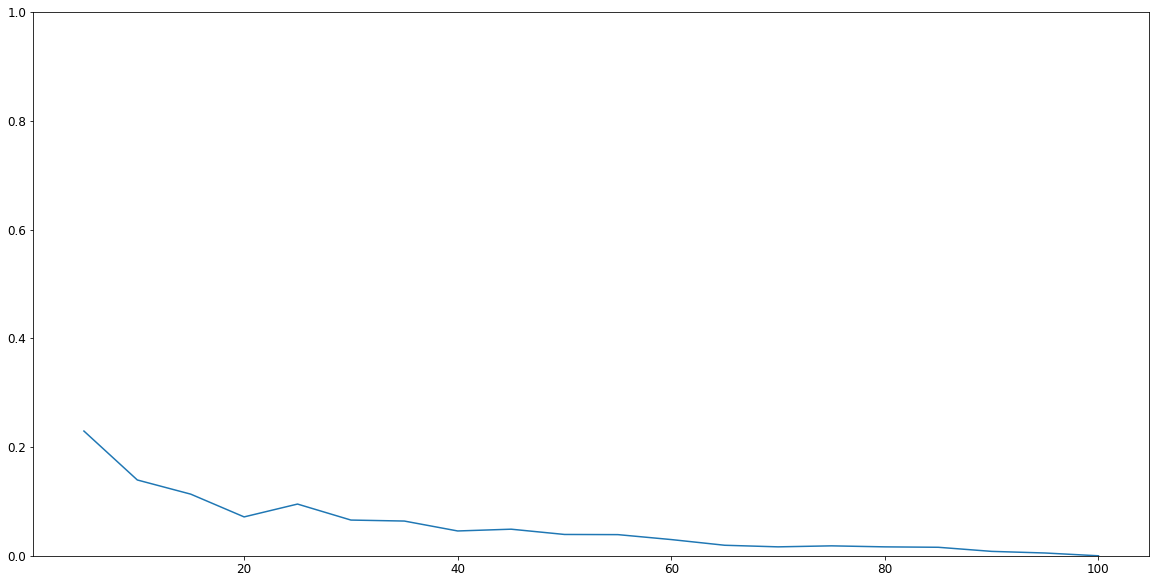

In [120]:
dim_str = "200 150 100"
plt.ylim(0,1)
plt.plot(list(map(int,bb_width[dim_str].keys())), list(bb_width[dim_str].values()))

In [164]:
sample_size_est = {}
for k,v in bb_width.items():
    ss = list(map(int,v.keys()))
    ss.sort()
    sample_size = -1
    for s in ss:
        if v[str(s)] < 0.051:
            if sample_size == -1:
                sample_size = s
        else:
            sample_size = -1
            
    sample_size_est[k] = sample_size

In [165]:
fb = []
sm_size = []
for k,v in sample_size_est.items():
    dims = list(map(int,k.split()))
    cost = float(2*dims[0]*dims[1]*dims[2])
    mem_refs = float(dims[0]*dims[1] + dims[1]*dims[2] + dims[0]*dims[2])
    fb.append(cost/mem_refs)
    sm_size.append(v)

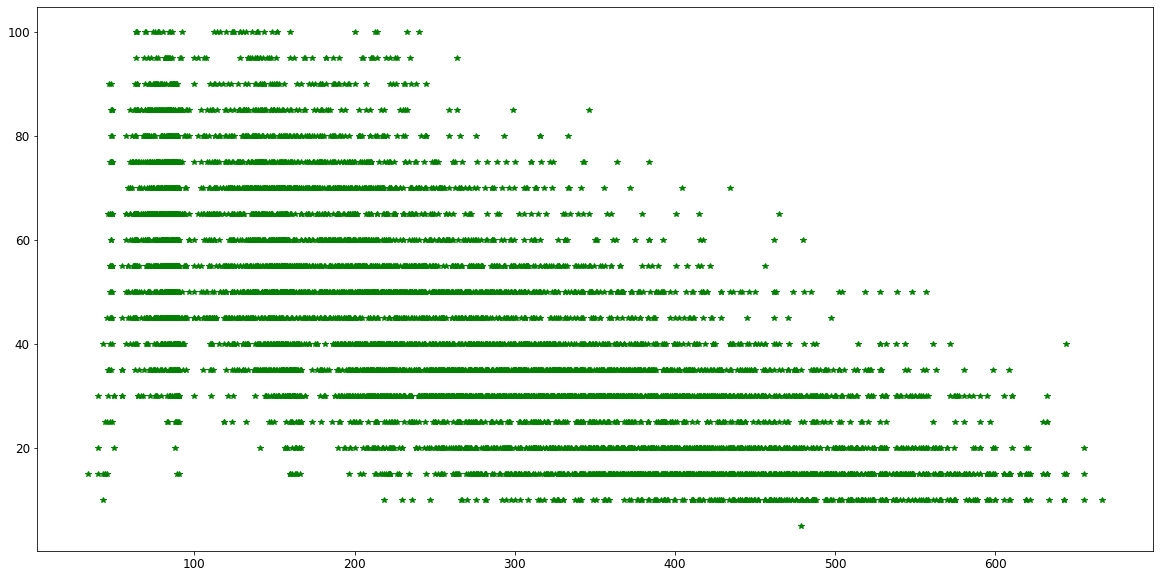

In [166]:
plt.plot(fb,sm_size,'*',color='g')

In [169]:
zipped = zip(fb,sm_size)
zipped = sorted(zipped, key=lambda t: t[0])
x=[]
y=[]
sj=[]
k=0
for i,j in zipped:
    k+=1
    if k%80 != 0:
        sj.append(j)
    else:
        y.append(np.mean(sj))
        x.append(i)
        sj=[]

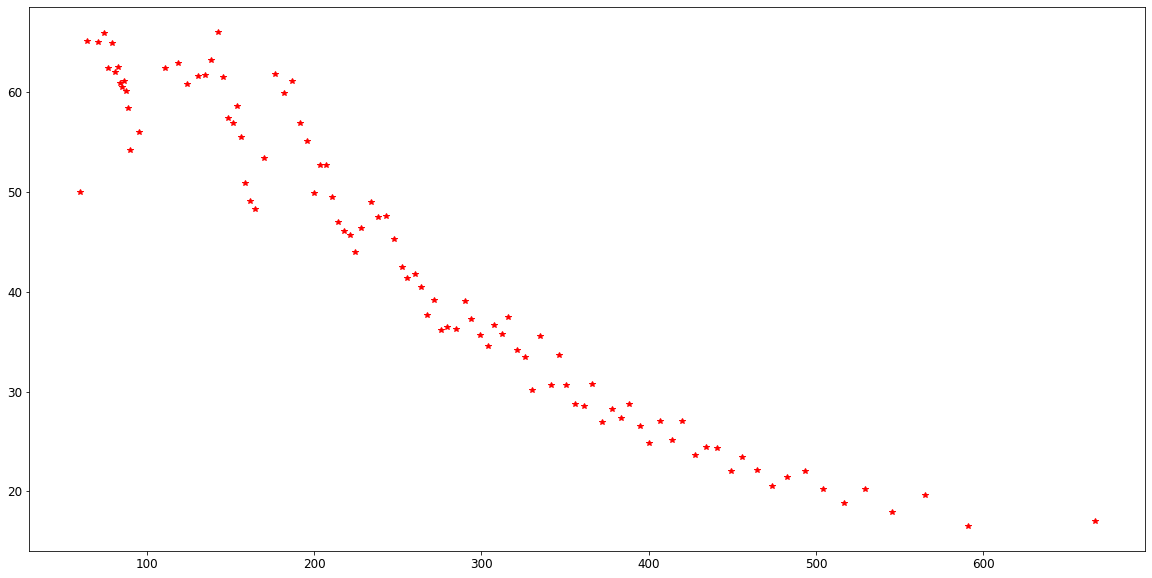

In [170]:
plt.plot(x,y,'*',color='r')

In [196]:
sample_size_est = {}
for k,v in bb_width.items():
    ss = list(map(int,v.keys()))
    ss.sort()
    sample_size = -1
    for s in ss:
        if v[str(s)] < 0.061:
            if sample_size == -1:
                sample_size = s
        #else:
        #    sample_size = -1
            
    sample_size_est[k] = sample_size

In [197]:
sq_x = []
sq_sm = []
for k,v in sample_size_est.items():
    dims = list(map(int,k.split()))
    if(dims[0]==dims[1]==dims[2]):
        sq_x.append(dims[0])
        sq_sm.append(v)

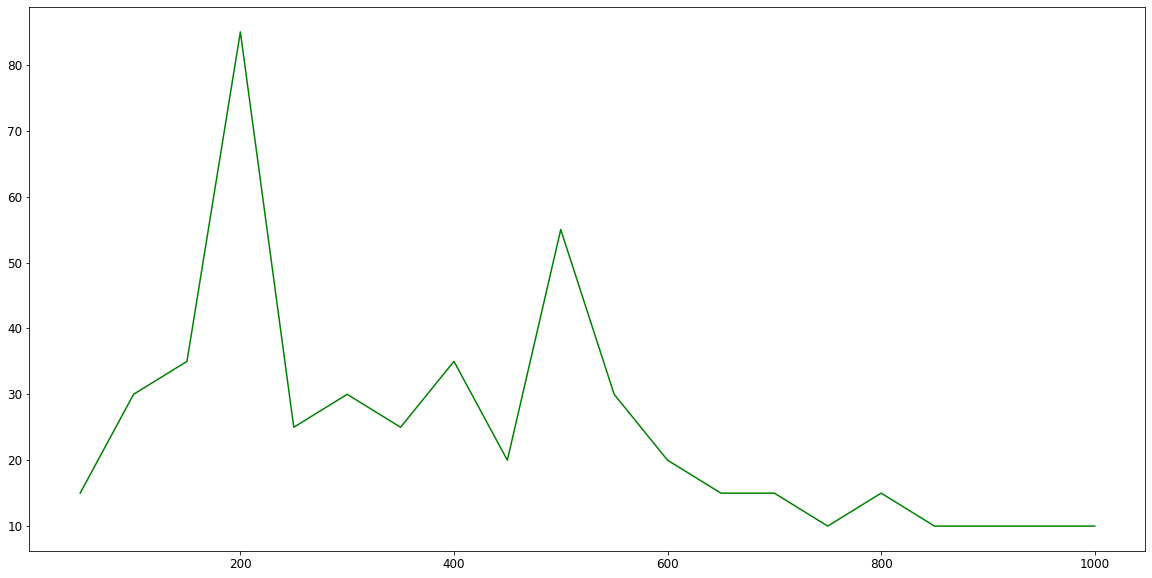

In [198]:
zipped = zip(sq_x,sq_sm)
zipped = sorted(zipped, key=lambda t: t[0])
#plt.plot(sq_x,sq_sm,'o',color='g')
plt.plot(np.array(zipped)[:,0],np.array(zipped)[:,1],color='g')